# Evolution de l'anomalie globale de température depuis 1880

Auteur : FERRY Frédéric (ENM/C3M) - novembre 2020

Données :
https://data.giss.nasa.gov/gistemp/

https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv
https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz

In [1]:
%matplotlib inline

import os

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import pandas as pd
from pandas import Series
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from cartopy import config
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid

In [15]:
dates=pd.read_csv('./data/GLB.Ts+dSST.csv', sep=',',header=1, usecols=[0], skipfooter=1, engine='python')
tg=pd.read_csv('./data/GLB.Ts+dSST.csv', sep=',',header=1, usecols=[1,2,3,4,5,6,7,8,9,10,11,12],
               skipfooter=1, engine='python')
print(dates)
print(tg)
tg=tg.mean(axis = 1)
print(tg)

     Year
0    1880
1    1881
2    1882
3    1883
4    1884
..    ...
137  2017
138  2018
139  2019
140  2020
141  2021

[142 rows x 1 columns]
      Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
0   -0.18 -0.25 -0.09 -0.16 -0.10 -0.21 -0.18 -0.10 -0.14 -0.24 -0.22 -0.17
1   -0.19 -0.14  0.03  0.05  0.06 -0.19  0.01 -0.03 -0.15 -0.22 -0.18 -0.07
2    0.16  0.14  0.05 -0.16 -0.14 -0.22 -0.16 -0.08 -0.15 -0.23 -0.17 -0.36
3   -0.29 -0.37 -0.12 -0.19 -0.18 -0.07 -0.07 -0.14 -0.22 -0.11 -0.24 -0.11
4   -0.13 -0.08 -0.36 -0.40 -0.34 -0.35 -0.33 -0.28 -0.27 -0.25 -0.33 -0.31
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
137  1.01  1.13  1.16  0.94  0.90  0.71  0.81  0.87  0.77  0.90  0.88  0.93
138  0.81  0.84  0.88  0.88  0.82  0.77  0.82  0.76  0.80  1.01  0.82  0.91
139  0.92  0.95  1.17  1.01  0.84  0.90  0.94  0.94  0.92  1.01  0.99  1.08
140  1.16  1.24  1.16  1.13  1.01  0.91  0.90  0.87  0.98  0.88  1.10  0.81
141  0.81  0.64  0.8

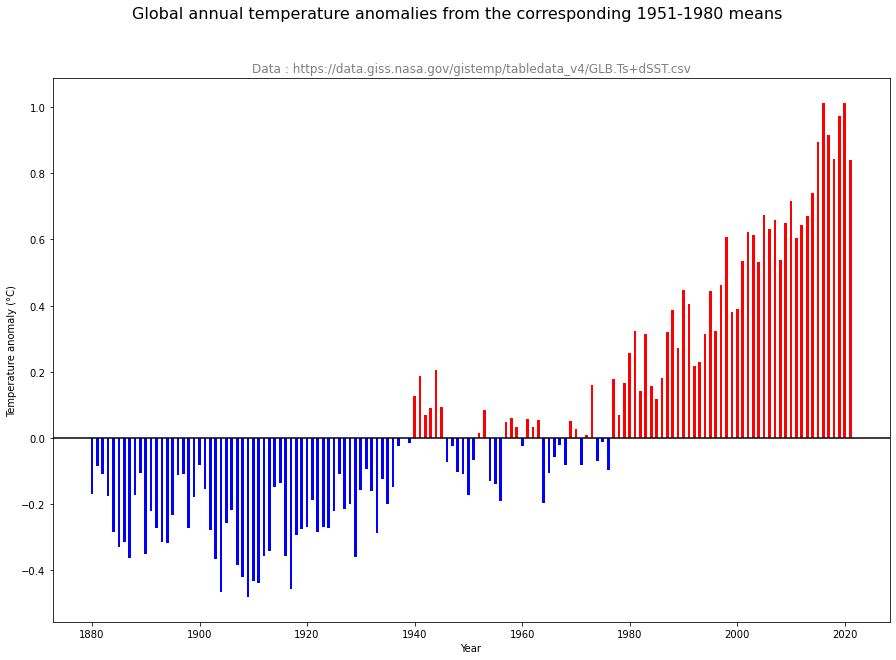

In [16]:
years=np.arange(1880,2022)

fig=plt.figure(figsize=(15, 10))
fig.suptitle('Global annual temperature anomalies from the corresponding 1951-1980 means', fontsize=16)
plt.title('Data : https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv' ,
          fontsize=12, color='grey')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly (°C)')
plt.axhline(0, color='k')

colormat=np.where(tg>0, 'red','blue')
plt.bar(years, tg, width=0.5, color=colormat)

plt.show()
figname='./figs/GISTEMP_Tglob'
fig.savefig(figname+'.png',bbox_inches='tight')

In [18]:
t    = xr.open_dataset("./data/gistemp1200_GHCNv4_ERSSTv5.nc")
print(t)
tyear=t.sel(time=slice('1880','2021')).groupby('time.year').mean('time', skipna=False)
print(tyear)

years=tyear.year.values
lat=tyear.lat.values
lon=tyear.lon.values
print(years)

data=tyear['tempanomaly']
print(data.shape)

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1708, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2022-04-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2022-05-11 09:46:13 by SBBX_to_nc 2.0 - ILAND=1200,...
<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, year: 142)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * year   

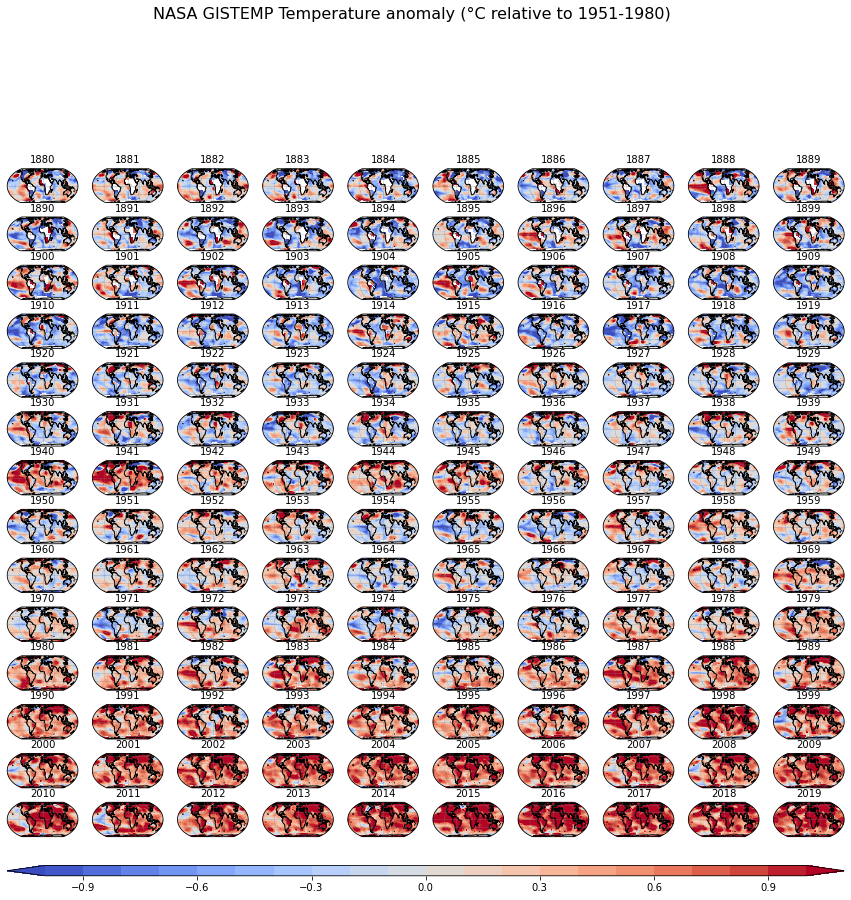

In [19]:
def plot_background(ax):
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
    return ax

proj=ccrs.EqualEarth()

levels=np.arange(-1,1.1, 0.1)

axes_class = (GeoAxes, dict(map_projection=proj))
fig = plt.figure(figsize=(15,15))
fig.suptitle('NASA GISTEMP Temperature anomaly (°C relative to 1951-1980)', fontsize=16)

axgr = AxesGrid(fig, 111, axes_class=axes_class,
       nrows_ncols=(14, 10),
       axes_pad=0.2,
       cbar_location='bottom',
       cbar_mode='single', # None/single/each
       cbar_pad=0.2,
       cbar_size='3%',
       label_mode='')  # note the empty label_mode

start,stop = 0,len(years)-1

for i, ax in enumerate(axgr[:stop-start]):
   plot_background(ax)
   ax.set_title(str(years[i]), fontsize=10)
   p1 = ax.contourf(lon, lat, data[i,:,:], levels=levels, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
   #p2 = ax.contour(lon, lat, data[i,:,:], colors='black', levels=levels, linewidths=0.2, transform=ccrs.PlateCarree())
   axgr.cbar_axes[i].colorbar(p1)
   
plt.show()

figname='./figs/GISTEMP_Tanom'
fig.savefig(figname+'.png',bbox_inches='tight')

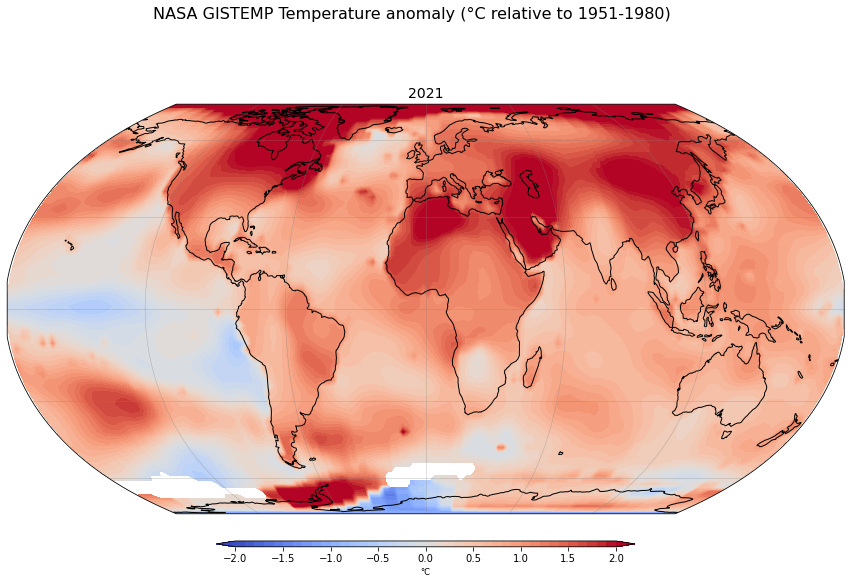

In [20]:
iyear=2021
idx = list(years).index(iyear)

proj=ccrs.EqualEarth()

levels=np.arange(-2,2.1, 0.1)

fig = plt.figure(figsize=(15,10))
fig.suptitle('NASA GISTEMP Temperature anomaly (°C relative to 1951-1980)', fontsize=16)
ax = fig.add_subplot(1, 1, 1, projection=proj)
plot_background(ax)
ax.set_title(str(iyear), fontsize=14)
p1 = ax.contourf(lon, lat, data[idx,:,:], levels=levels, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
#p2 = ax.contour(lon, lat, data[idx,:,:], colors='black', levels=levels, linewidths=0.2, transform=ccrs.PlateCarree())
cb = fig.colorbar(p1, orientation='horizontal', aspect=65, shrink=0.5, pad=0.05)
cb.set_label('°C', size='small')   
plt.show()

figname='./figs/GISTEMP_Tanom_'+str(iyear)
fig.savefig(figname+'.png',bbox_inches='tight')